In [ ]:
# Objectives of the Life Expectancy Data Analysis Project
# To create histograms for each numerical feature in order to explore their distributions, detect skewness, and assess the presence of outliers.
# To reload the cleaned dataset and perform bivariate analysis in order to explore relationships between key features and the target variable (life expectancy).
# To conduct categorical variable analysis using bar charts and counts, in order to understand the distribution of non-numerical features like Status.
# To generate a box plot comparing life expectancy in developed vs developing countries in order to assess disparities in global health outcomes.
# To create a correlation matrix heatmap using seaborn in order to identify linear relationships and potential multicollinearity among numerical variables.
# To plot key variable relationships such as GDP vs Life Expectancy using scatter plots, in order to visualize trends and strength of association.
# To conduct overall Exploratory Data Analysis (EDA) and bivariate comparisons to uncover interactions between variables that could influence model predictions.
# To visualize key health indicators by country status, in order to observe how metrics like adult mortality, BMI, or schooling differ between developed and developing nations.
# To display the trend of life expectancy over time, grouped by country, in order to observe global or regional progress.
# To use violin plots to explore the distribution and variability of life expectancy across categories like Status, in order to detect underlying trends.
# To engineer new features such as normalized ratios or aggregates (e.g., health expenditure per capita, schooling interaction) in order to enhance model accuracy and capture complex patterns that are not explicit in the raw data.
# To visualize and inspect the distribution of newly engineered features in order to validate their usefulness before including them in the final model.
# To build a baseline regression model using the Random Forest Regressor from sklearn.ensemble on the original (non-engineered) dataset, in order to establish a reference point for performance evaluation.
# To evaluate the baseline model using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R² Score, in order to assess its predictive quality.
# To train a new regression model using the Random Forest Regressor on the dataset with engineered features, in order to test whether feature engineering improves model performance.
# To compare the baseline model (without engineered features) to the enhanced model (with engineered features), in order to measure the impact of feature engineering on predictive power.
# To implement cross-validation using K-Fold techniques, in order to ensure that model performance is generalizable and not overly dependent on the training/test split.
# To analyze and interpret the results from both models in order to determine which features most strongly influence life expectancy.
# To draw actionable insights and recommendations, such as investing in healthcare or education, based on the model outputs and EDA findings.
# To summarize findings in a clear and structured conclusion that can inform public health strategies or policy decisions.


In [3]:
# Importing the libraries
import pandas as pd

# Loading the dataset
data_set = pd.read_csv("Life_expectancy_Data.csv")
data_set.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
# Initial dataset information before cleaning
print(f"\nThe information before cleaning:")
data_set.info()


The information before cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   int64  
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   int64  
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null  

In [5]:
# Descriptive Statistics of the dataset
print(f"\nThe descriptive statistics of the dataset:")
data_set.describe()


The descriptive statistics of the dataset:


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


In [6]:
# Shape of the dataset
print(f"\nThe shape of the dataset is: {data_set.shape}")



The shape of the dataset is: (1649, 22)


In [7]:
# Inspecting the columns of the dataset
print(f"\nThe columns in the dataset are:\n{data_set.columns.tolist()}")


The columns in the dataset are:
['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [8]:
# Checking for empty slots
print(f"\nEmpty slots:\n{data_set.isnull().sum()}")


Empty slots:
Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


In [9]:
print(f"\nDuplicate rows:\n{data_set.duplicated().sum()}")


Duplicate rows:
0


In [10]:
# Cleaning the column names to remove whitespaces
data_set.columns = data_set.columns.str.strip().str.replace(' ', '_', regex=True).str.replace("-", "_", regex=True)   
print("The columns have been cleaned to remove whitespaces and replace spaces with underscores.")

#Saving the cleaned data to a new csv file
data_set.to_csv("cleaned_life_expectancy_data.csv", index=False)
print("\nCleaned data saved to 'cleaned_life_expectancy_data.csv'")

The columns have been cleaned to remove whitespaces and replace spaces with underscores.

Cleaned data saved to 'cleaned_life_expectancy_data.csv'


In [11]:
# DATASET INFORMATION AFTER CLEANING
import pandas as pd

new_data_set = pd.read_csv("cleaned_life_expectancy_data.csv")

print("The first five rows of tthe cleaned dataset")
new_data_set.head()


The first five rows of tthe cleaned dataset


,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [12]:


print("Dataset information after cleaning")
new_data_set.info()

Dataset information after cleaning
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life_expectancy                  1649 non-null   float64
 4   Adult_Mortality                  1649 non-null   int64  
 5   infant_deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage_expenditure           1649 non-null   float64
 8   Hepatitis_B                      1649 non-null   int64  
 9   Measles                          1649 non-null   int64  
 10  BMI                              1649 non-null   float64
 11  under_five_deaths                1649 non-null 

In [13]:
import pandas as pd

new_data_set = pd.read_csv("cleaned_life_expectancy_data.csv")

# Descriptive information after cleaning
print("Descriptive summary of the dataset after cleaning")
display(new_data_set.describe())

# Columns after cleaning
print(f"\nThe columns of the cleaned dataset are:\n{new_data_set.columns.tolist()}")


Descriptive summary of the dataset after cleaning


,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000



The columns of the cleaned dataset are:
['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality', 'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness__1_19_years', 'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling']


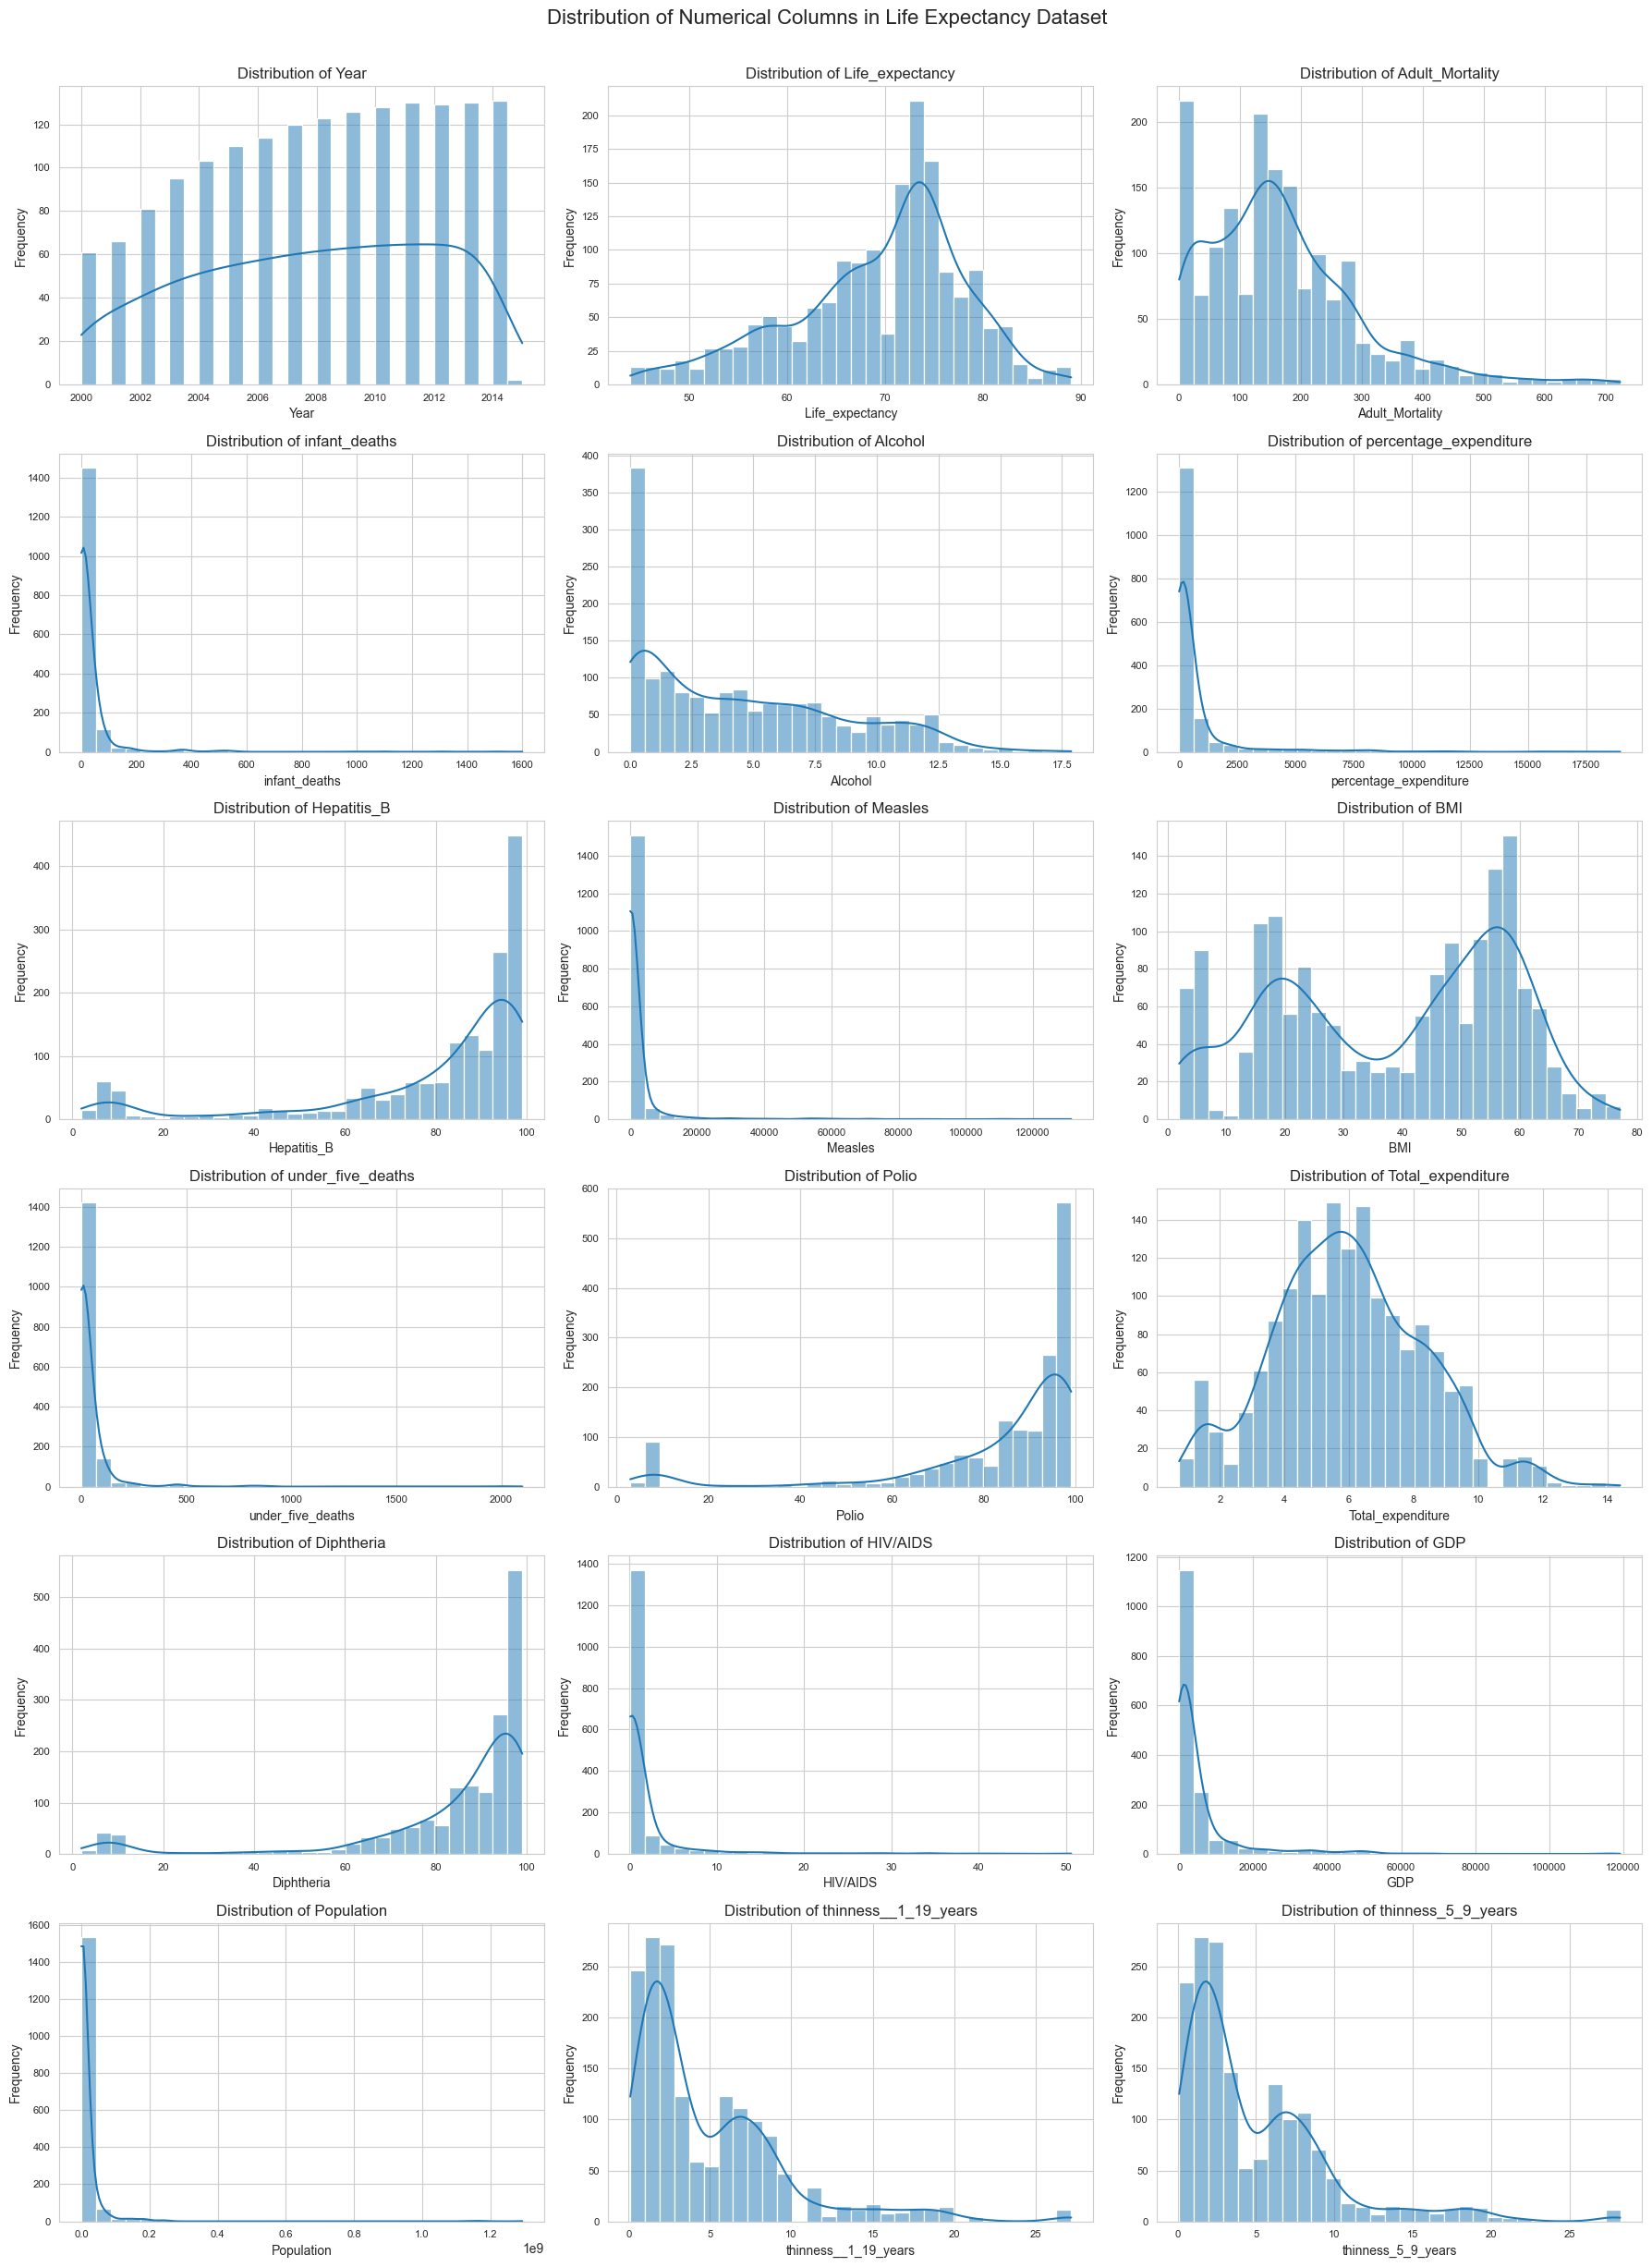

In [14]:

# CREATING HISTOGRAMS FOR NUMERICAL COLUMNS

# Exploratory Data Analysis (EDA)
# --- Univariate Analysis ---
# This section will visualize the distribution of numerical columns in the dataset
# Visualizing the distribution of life expectancy
# Setting the style of seaborn for the plots
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the cleaned dataset
new_data_set = pd.read_csv("cleaned_life_expectancy_data.csv")
# Numerical columns in the dataset
numeric_cols = new_data_set.select_dtypes(include=['float64', 'int64']).columns.tolist()
sns.set_style(style="whitegrid")

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(18, 24))
axes = axes.flatten() 

for i, col in enumerate(numeric_cols[:len(axes)]):
    sns.histplot(new_data_set[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f"Distribution of {col}", fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel("Frequency", fontsize=10)
    axes[i].tick_params(axis='both', which='major', labelsize=8)

# Hiding any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Distribution of Numerical Columns in Life Expectancy Dataset", y=1.02, fontsize=16,)
plt.savefig("images/life_expectancy_distribution.png", dpi=300)
plt.show()


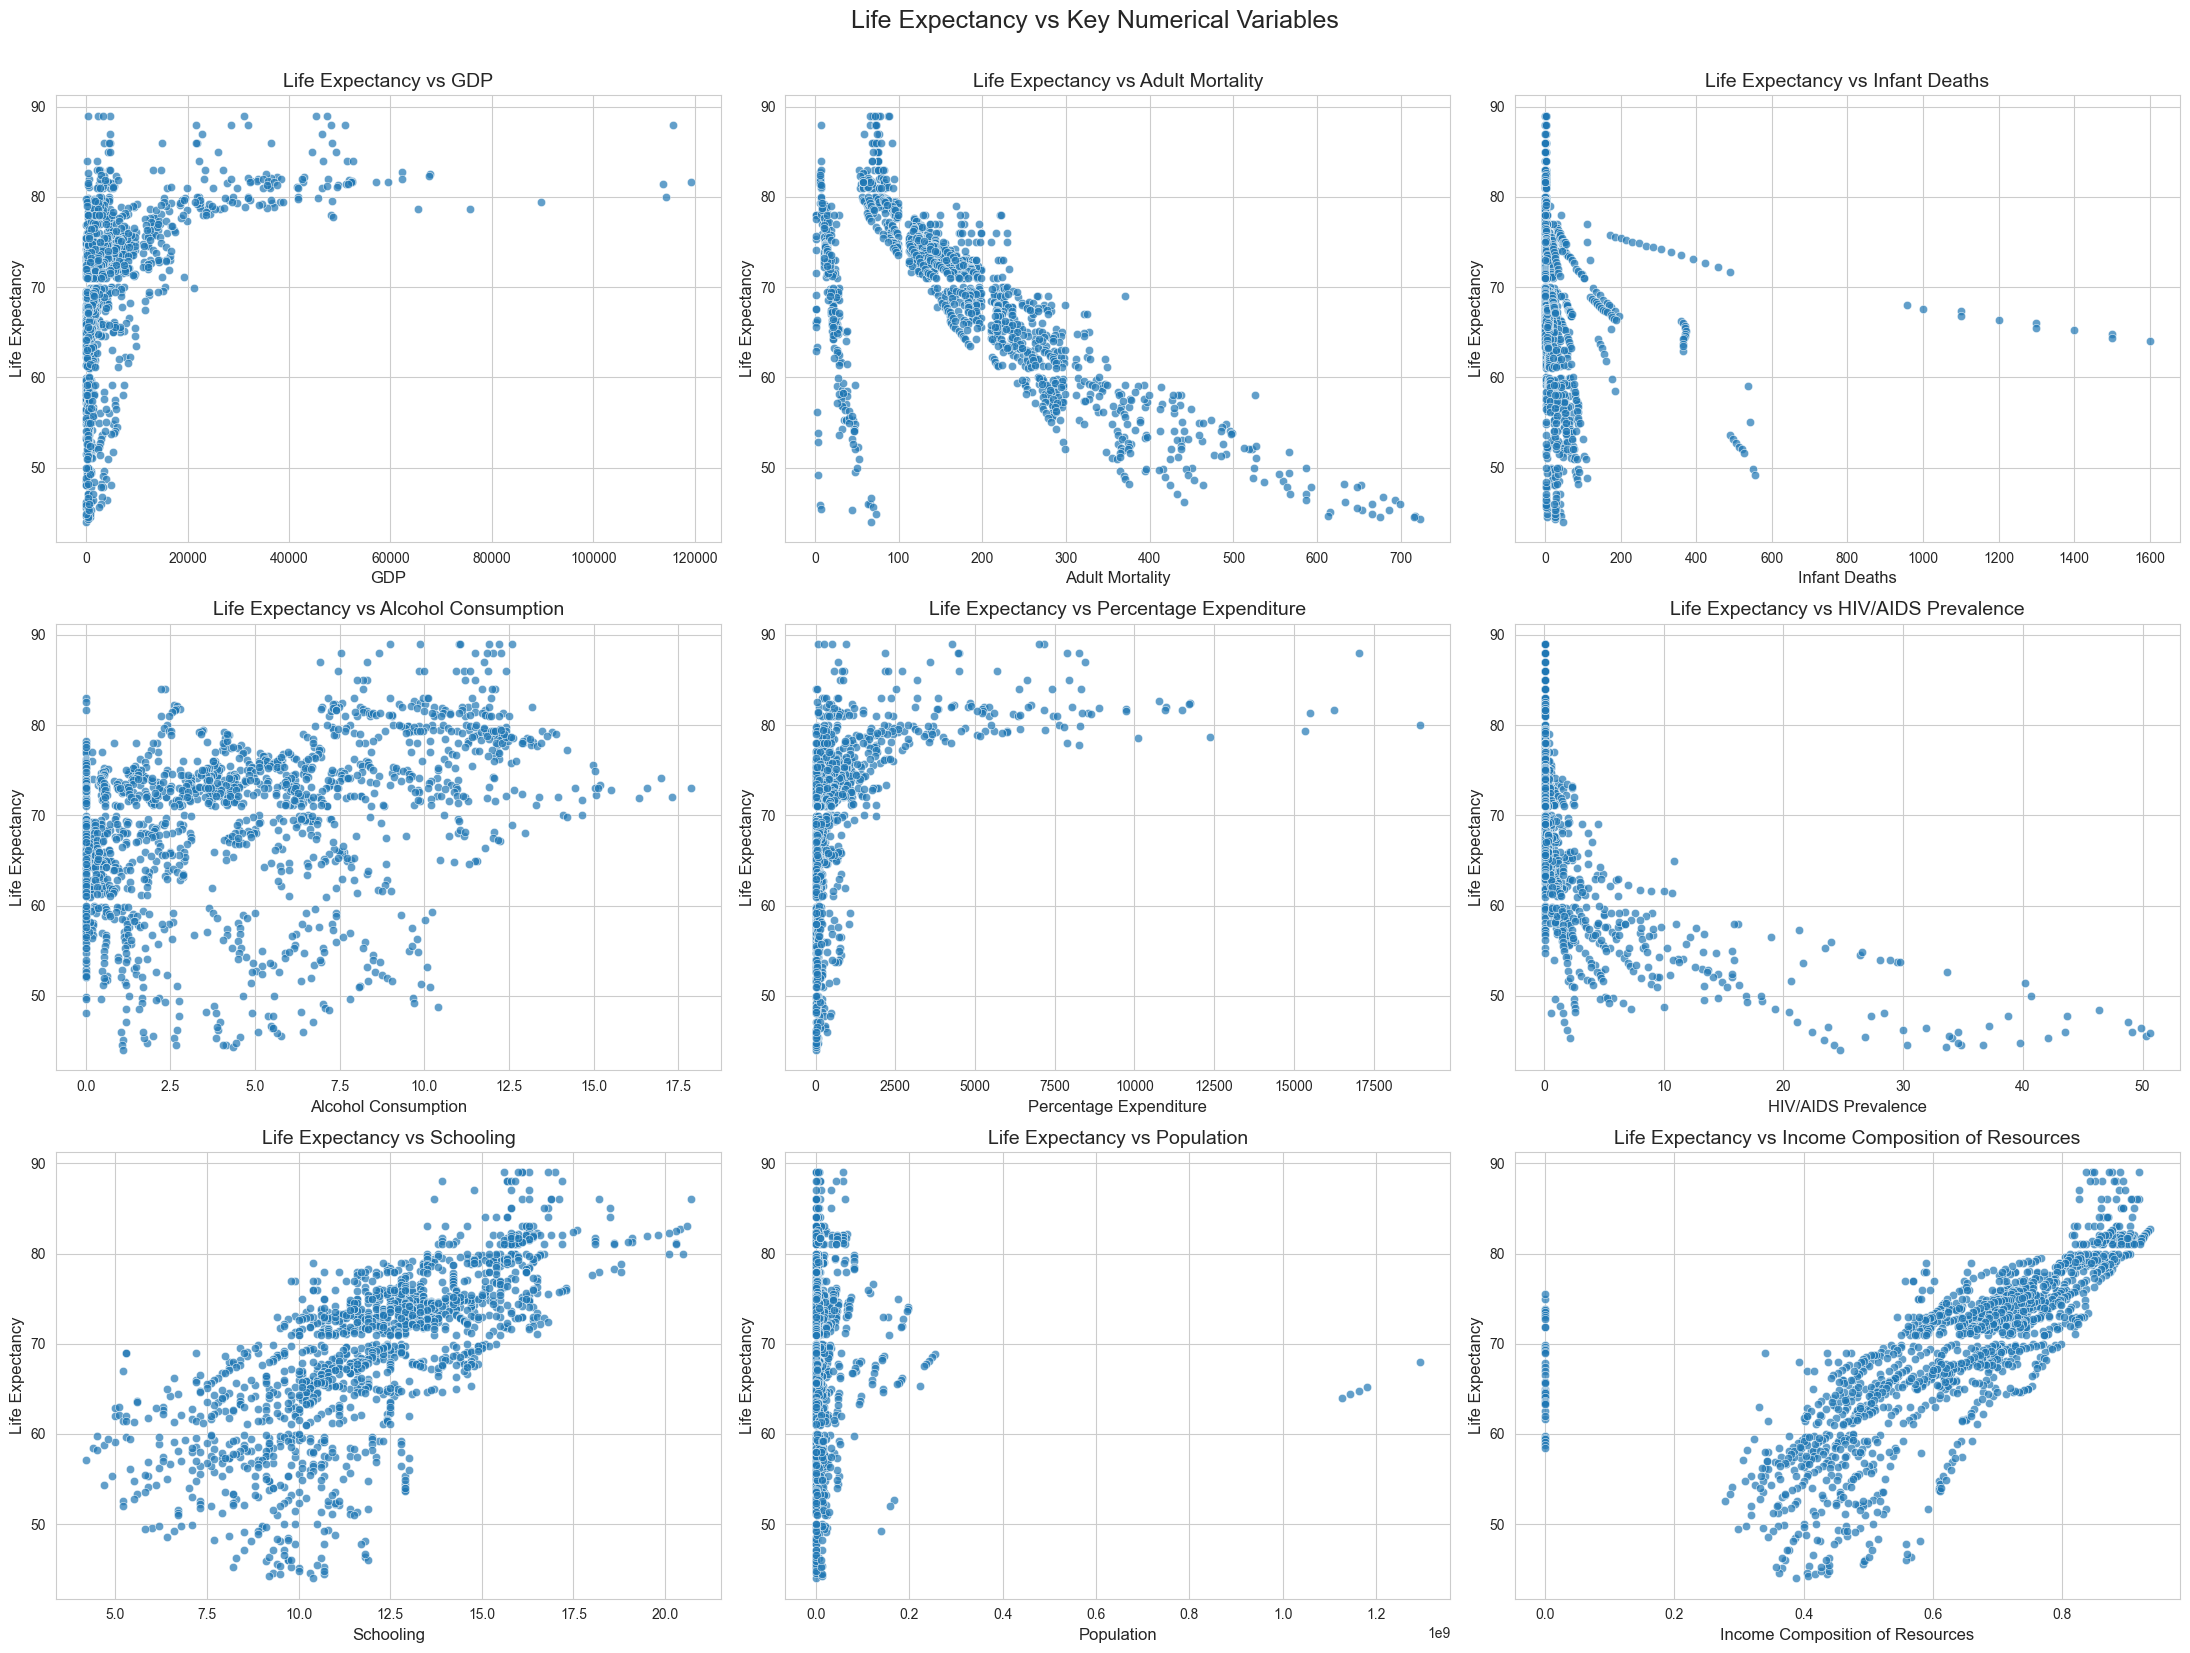

In [15]:
# Loading the cleaned dataset again for bivariate analysis
new_data_set = pd.read_csv("cleaned_life_expectancy_data.csv")
new_data_set.columns = new_data_set.columns.str.strip()

# --- Bivariate Analysis ---
# This section will visualize the relationships between pairs of numerical columns
# Set the aesthetic style of the plots
sns.set_style(style="whitegrid")

# List of variable pairs (x-axis) and their titles
variables = [
    ('GDP', "Life Expectancy vs GDP", "GDP"),
    ('Adult_Mortality', "Life Expectancy vs Adult Mortality", "Adult Mortality"),
    ('infant_deaths', "Life Expectancy vs Infant Deaths", "Infant Deaths"),
    ('Alcohol', "Life Expectancy vs Alcohol Consumption", "Alcohol Consumption"),
    ('percentage_expenditure', "Life Expectancy vs Percentage Expenditure", "Percentage Expenditure"),
    ('HIV/AIDS', "Life Expectancy vs HIV/AIDS Prevalence", "HIV/AIDS Prevalence"),
    ('Schooling', "Life Expectancy vs Schooling", "Schooling"),
    ('Population', "Life Expectancy vs Population", "Population"),
    ('Income_composition_of_resources', "Life Expectancy vs Income Composition of Resources", "Income Composition of Resources")
]

# Setting up subplot grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(22, 16))
axes = axes.flatten()

# Plotting each relationship
for i, (x_col, title, xlabel) in enumerate(variables):
    sns.scatterplot(x=x_col, y='Life_expectancy', data=new_data_set, ax=axes[i], alpha=0.7)
    axes[i].set_title(title, fontsize=14)
    axes[i].set_xlabel(xlabel, fontsize=12)
    axes[i].set_ylabel("Life Expectancy", fontsize=12)

# Hiding any unused subplot (last one if variables < 12)
for j in range(len(variables), len(axes)):
    axes[j].axis('off')

# Adjusting spacing
plt.tight_layout()
plt.suptitle("Life Expectancy vs Key Numerical Variables", fontsize=18, y=1.03)

# Saving the combined figure
plt.savefig("images/life_expectancy_bivariate_all_in_one.png", dpi=300)
plt.show()


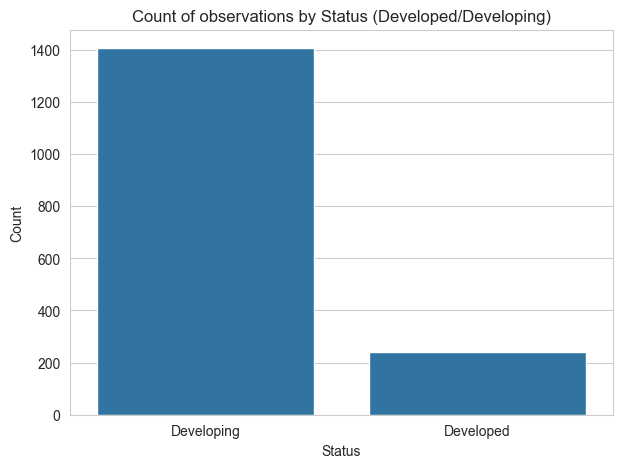

In [16]:
# CATEGORICAL VARIABLES ANALYSIS
# Visualizing the distribution of the categorical variable 'Status'
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the cleaned dataset
new_data_set = pd.read_csv("cleaned_life_expectancy_data.csv")

# Set the aesthetic style of the plots
sns.set_style(style="whitegrid")

# Distribution of 'status'
plt.figure(figsize=(7, 5))
sns.countplot(x='Status', data=new_data_set)
plt.title("Count of observations by Status (Developed/Developing)")
plt.xlabel("Status")
plt.ylabel("Count")
plt.savefig("images/status_distribution.png")
plt.show()



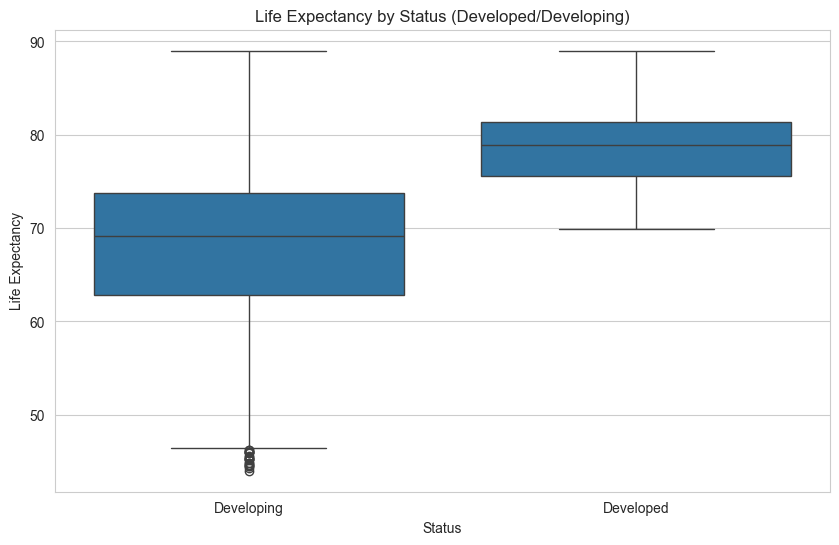

In [17]:
# BOX PLOT COMPARING 'LIFE EXPECTANCY' BETWEEN 'DEVELOPING' AND 'DEVELOPED' COUNTRIES

plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Life_expectancy', data=new_data_set)
plt.title("Life Expectancy by Status (Developed/Developing)")
plt.xlabel("Status")
plt.ylabel("Life Expectancy")
plt.savefig("images/life_expectancy_by_status.png")
plt.show()


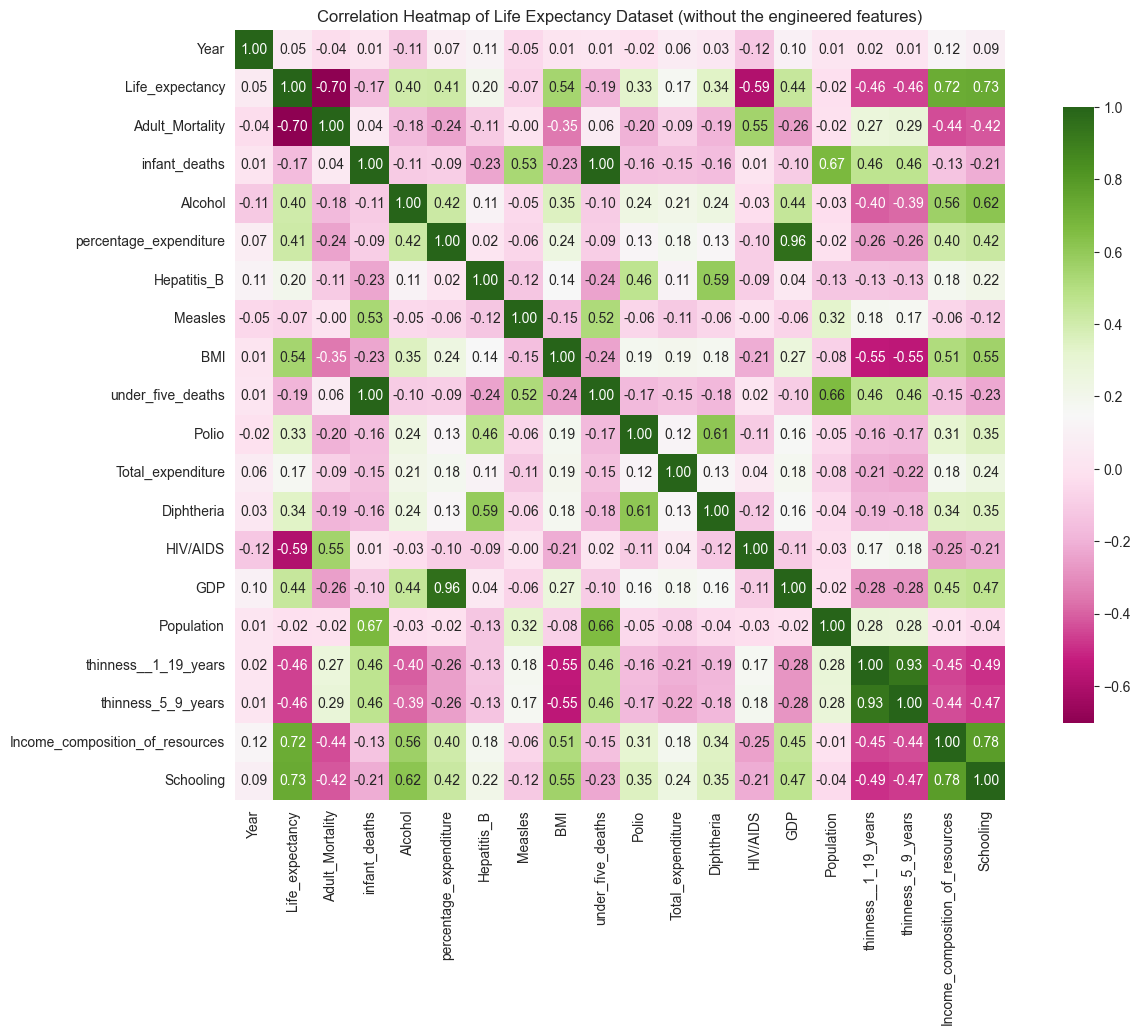

In [18]:
# CORRELATION MATRIX
plt.figure(figsize=(15, 10)) 

# Calculating the correlation matrix for numerical columns
correlation_matrix = new_data_set.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='PiYG', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap of Life Expectancy Dataset (without the engineered features)")
plt.savefig("images/correlation_heatmap.png")
plt.show()

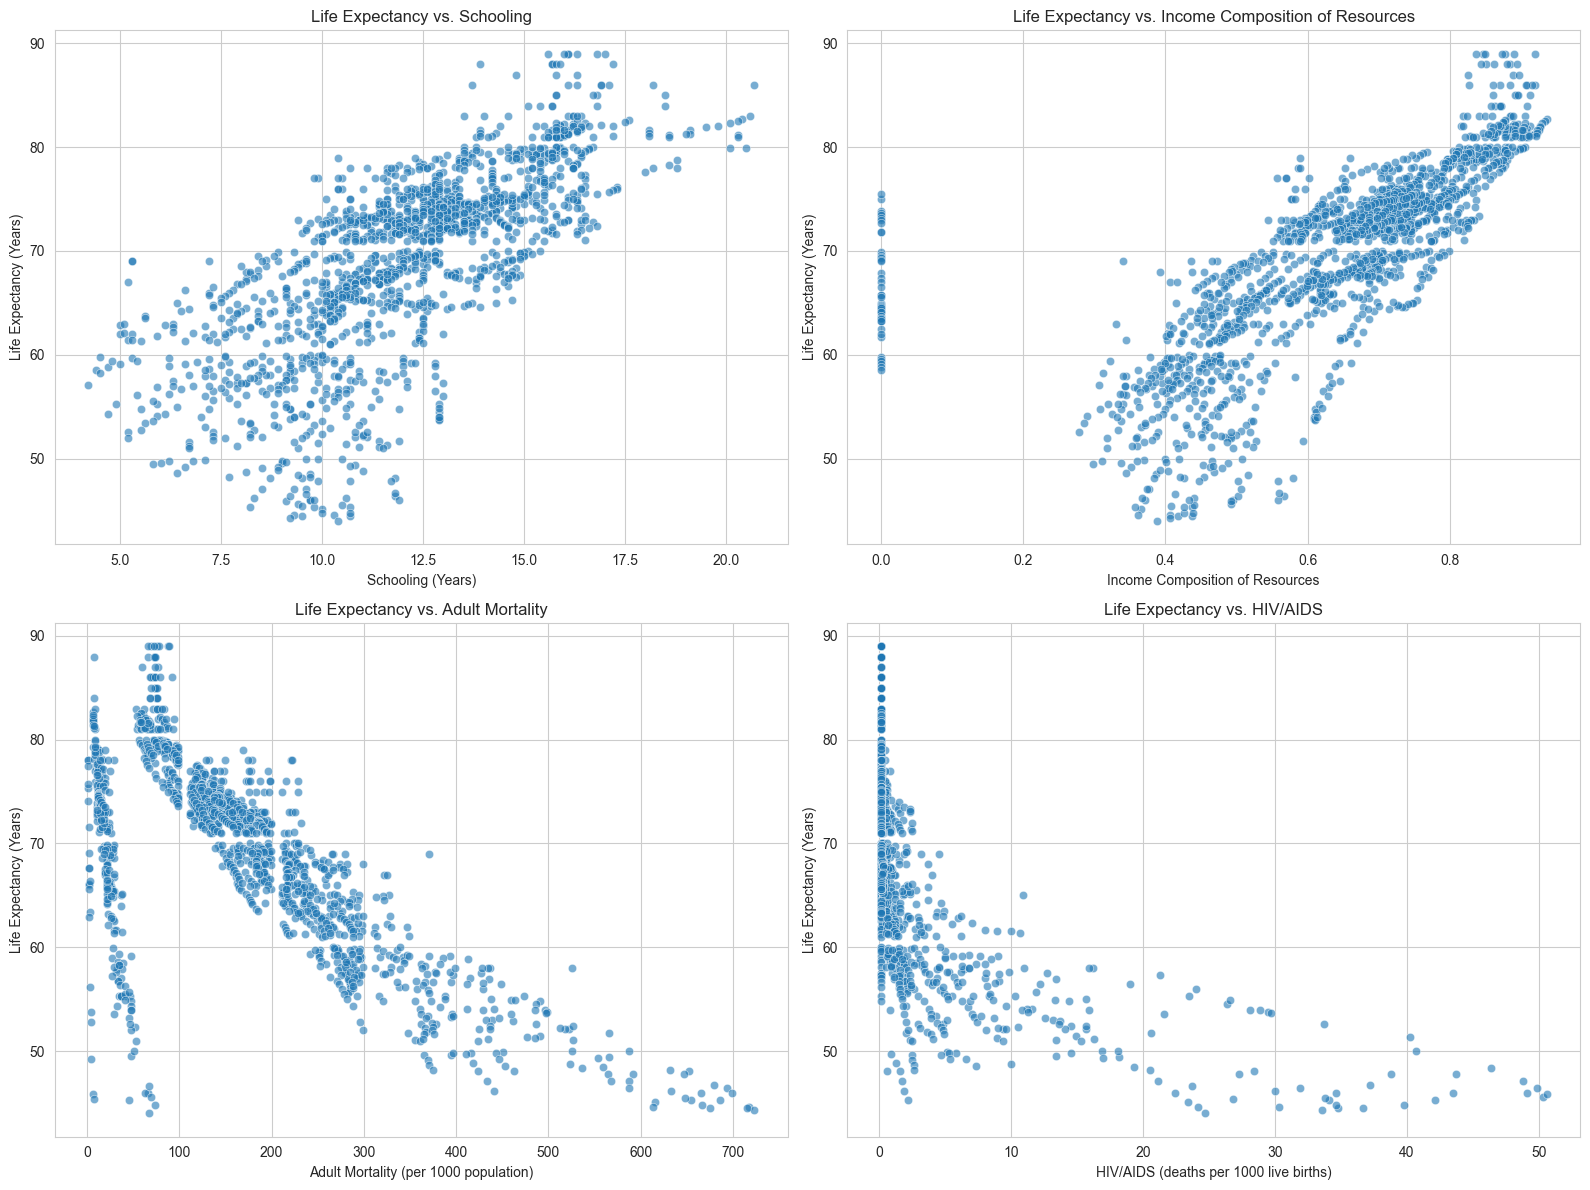

In [19]:
# VISUALIZING KEY RELATIONSHIPS
# scatter plots for key relationships with 'Life Expectancy'
import matplotlib.pyplot as plt
import seaborn as sns

# Ensuring column names are stripped
new_data_set.columns = new_data_set.columns.str.strip()

# Setting the whitegrid style of the plots
sns.set_style("whitegrid")

# Creating scatter plots for key relationships with 'Life expectancy'
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
axes = axes.flatten()

# Variables with strong positive correlation with Life Expectancy
sns.scatterplot(x='Schooling', y='Life_expectancy', data=new_data_set, ax=axes[0], alpha=0.6)
axes[0].set_title('Life Expectancy vs. Schooling')
axes[0].set_xlabel('Schooling (Years)')
axes[0].set_ylabel('Life Expectancy (Years)')

sns.scatterplot(x='Income_composition_of_resources', y='Life_expectancy', data=new_data_set, ax=axes[1], alpha=0.6)
axes[1].set_title('Life Expectancy vs. Income Composition of Resources')
axes[1].set_xlabel('Income Composition of Resources')
axes[1].set_ylabel('Life Expectancy (Years)')

# Variables with strong negative correlation with Life Expectancy
sns.scatterplot(x='Adult_Mortality', y='Life_expectancy', data=new_data_set, ax=axes[2], alpha=0.6)
axes[2].set_title('Life Expectancy vs. Adult Mortality')
axes[2].set_xlabel('Adult Mortality (per 1000 population)')
axes[2].set_ylabel('Life Expectancy (Years)')

sns.scatterplot(x='HIV/AIDS', y='Life_expectancy', data=new_data_set, ax=axes[3], alpha=0.6)
axes[3].set_title('Life Expectancy vs. HIV/AIDS')
axes[3].set_xlabel('HIV/AIDS (deaths per 1000 live births)')
axes[3].set_ylabel('Life Expectancy (Years)')

plt.tight_layout()
plt.savefig('images/key_relationships_scatterplots.png')
plt.show() 


Exploratory Data Analysis (EDA) showing some of the distributions and relationships within the dataset.

Bivariate Analysis:


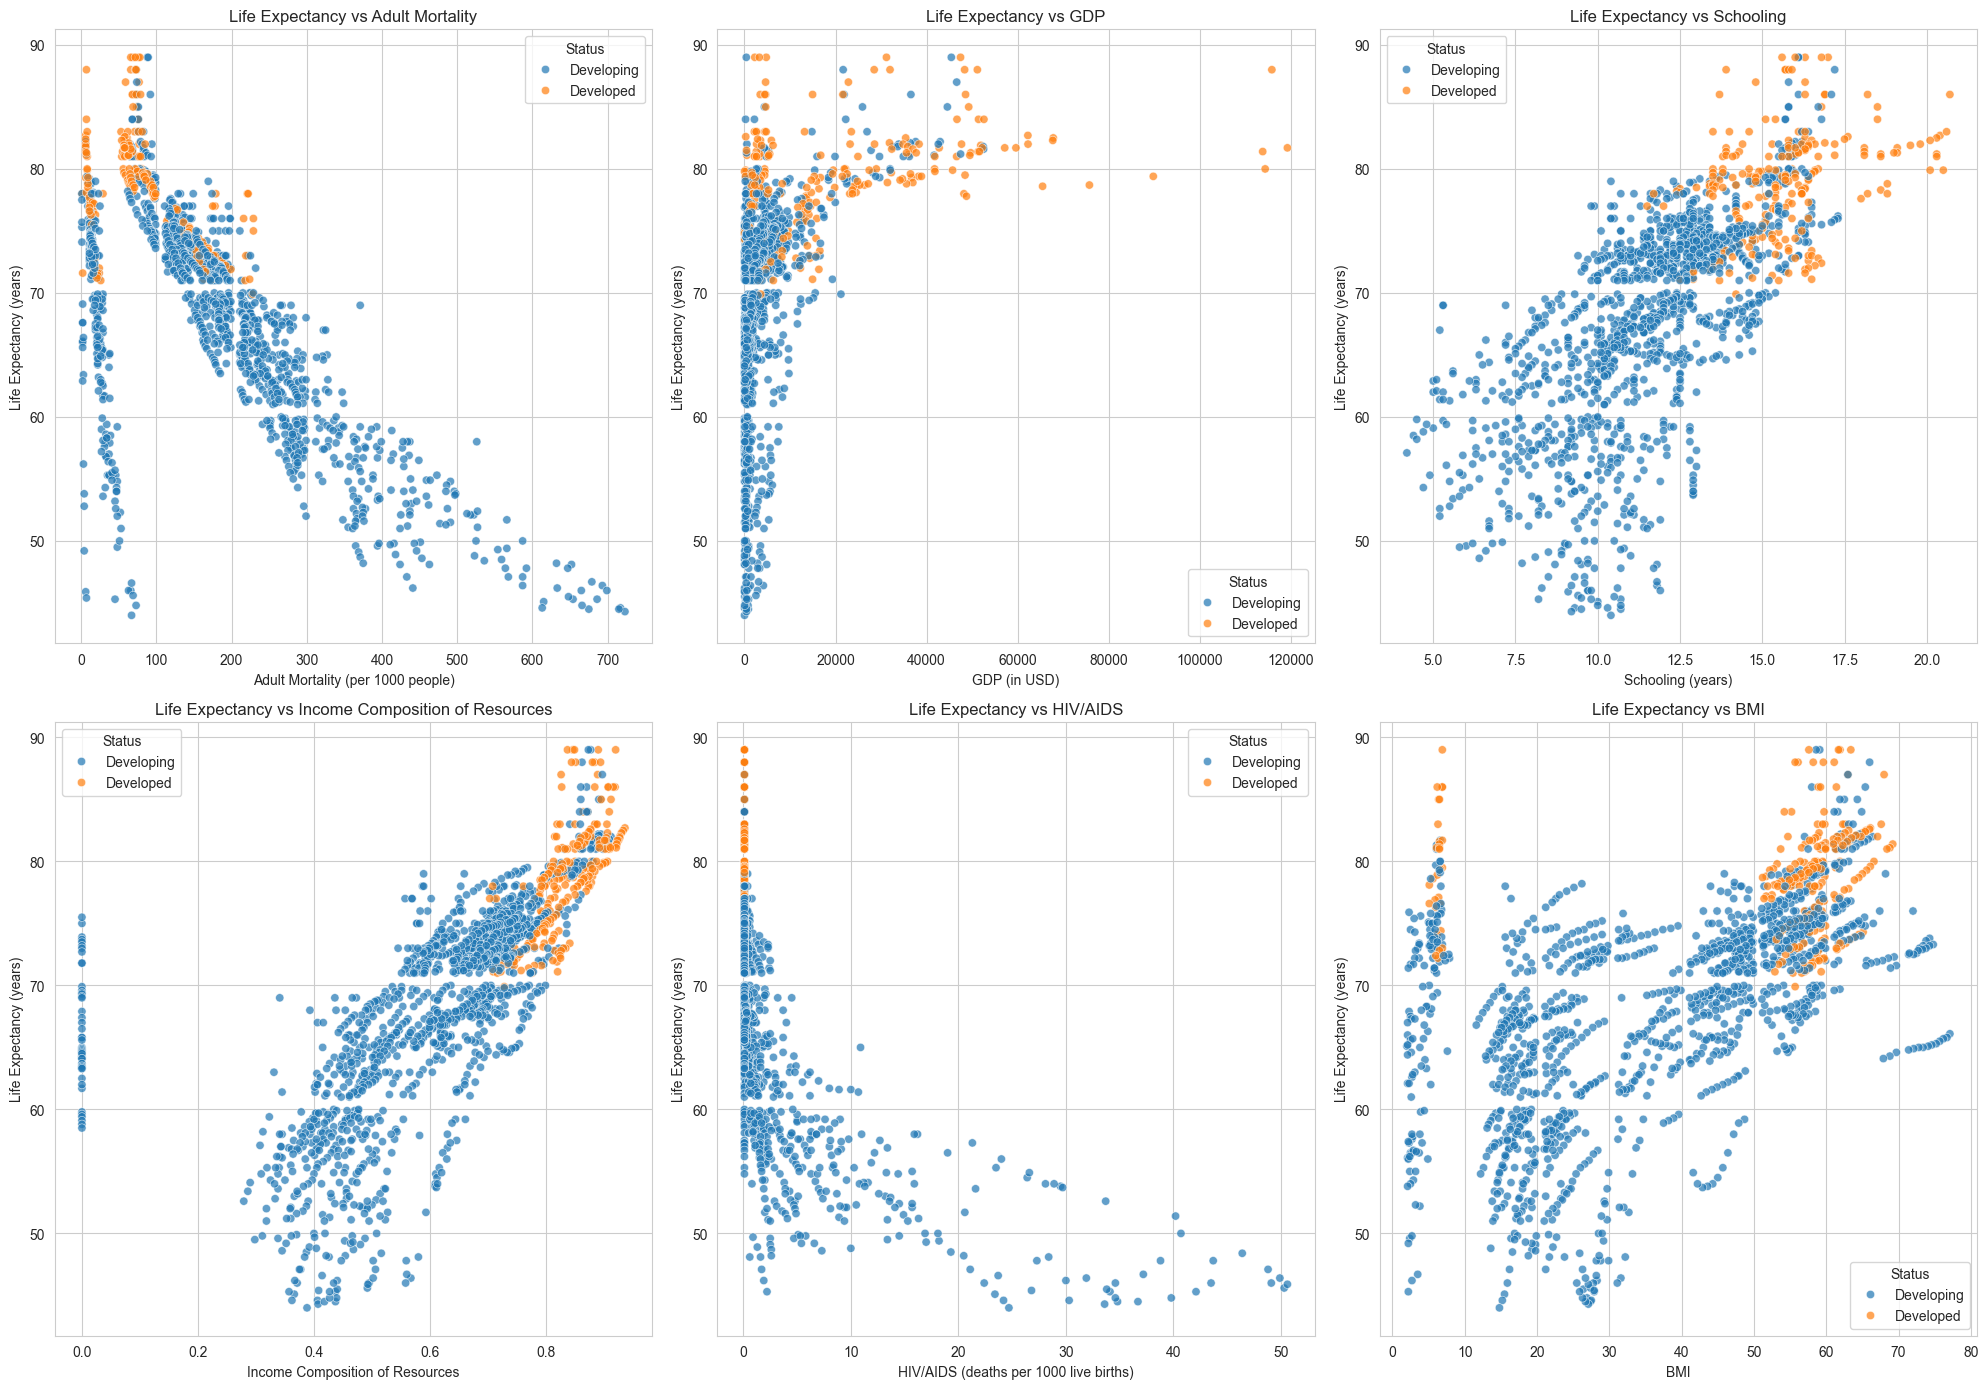

In [20]:
# EXPLORATORY DATA ANALYSIS (EDA) AND BIVARIATE ANALYSIS
# --- Multivariate Analysis ---
print("\nExploratory Data Analysis (EDA) showing some of the distributions and relationships within the dataset.")
print("\nBivariate Analysis:")
import matplotlib.pyplot as plt
import seaborn as sns
import os

df = new_data_set.copy()

# Ensuring column names are stripped of whitespace
df.columns = df.columns.str.strip()

# Setting visual style
sns.set_style("whitegrid")

# Creating a 2x3 subplot figure for 6 plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 14)) # Adjusted for more plots
axes = axes.flatten()

#Life Expectancy vs Adult Mortality
sns.scatterplot(x='Adult_Mortality', y='Life_expectancy', hue='Status', data=df, ax=axes[0], alpha=0.7)
axes[0].set_title("Life Expectancy vs Adult Mortality")
axes[0].set_xlabel("Adult Mortality (per 1000 people)")
axes[0].set_ylabel("Life Expectancy (years)")

# Life Expectancy vs GDP
sns.scatterplot(x='GDP', y='Life_expectancy', hue='Status', data=df, ax=axes[1], alpha=0.7)
axes[1].set_title("Life Expectancy vs GDP")
axes[1].set_xlabel("GDP (in USD)")
axes[1].set_ylabel("Life Expectancy (years)")

#Life Expectancy vs Schooling
sns.scatterplot(x='Schooling', y='Life_expectancy', hue='Status', data=df, ax=axes[2], alpha=0.7)
axes[2].set_title("Life Expectancy vs Schooling")
axes[2].set_xlabel("Schooling (years)")
axes[2].set_ylabel("Life Expectancy (years)")

#Life Expectancy vs Income composition of resources 
sns.scatterplot(x='Income_composition_of_resources', y='Life_expectancy', hue='Status', data=df, ax=axes[3], alpha=0.7)
axes[3].set_title("Life Expectancy vs Income Composition of Resources")
axes[3].set_xlabel("Income Composition of Resources")
axes[3].set_ylabel("Life Expectancy (years)")

#Life Expectancy vs HIV/AIDS 
sns.scatterplot(x='HIV/AIDS', y='Life_expectancy', hue='Status', data=df, ax=axes[4], alpha=0.7)
axes[4].set_title("Life Expectancy vs HIV/AIDS")
axes[4].set_xlabel("HIV/AIDS (deaths per 1000 live births)")
axes[4].set_ylabel("Life Expectancy (years)")

# Life Expectancy vs BMI 
sns.scatterplot(x='BMI', y='Life_expectancy', hue='Status', data=df, ax=axes[5], alpha=0.7)
axes[5].set_title("Life Expectancy vs BMI")
axes[5].set_xlabel("BMI")
axes[5].set_ylabel("Life Expectancy (years)")

# Adjusting layout
plt.tight_layout()

# Saving the figure
plt.savefig("images/life_expectancy_bivariate_relationships.png")
plt.show()

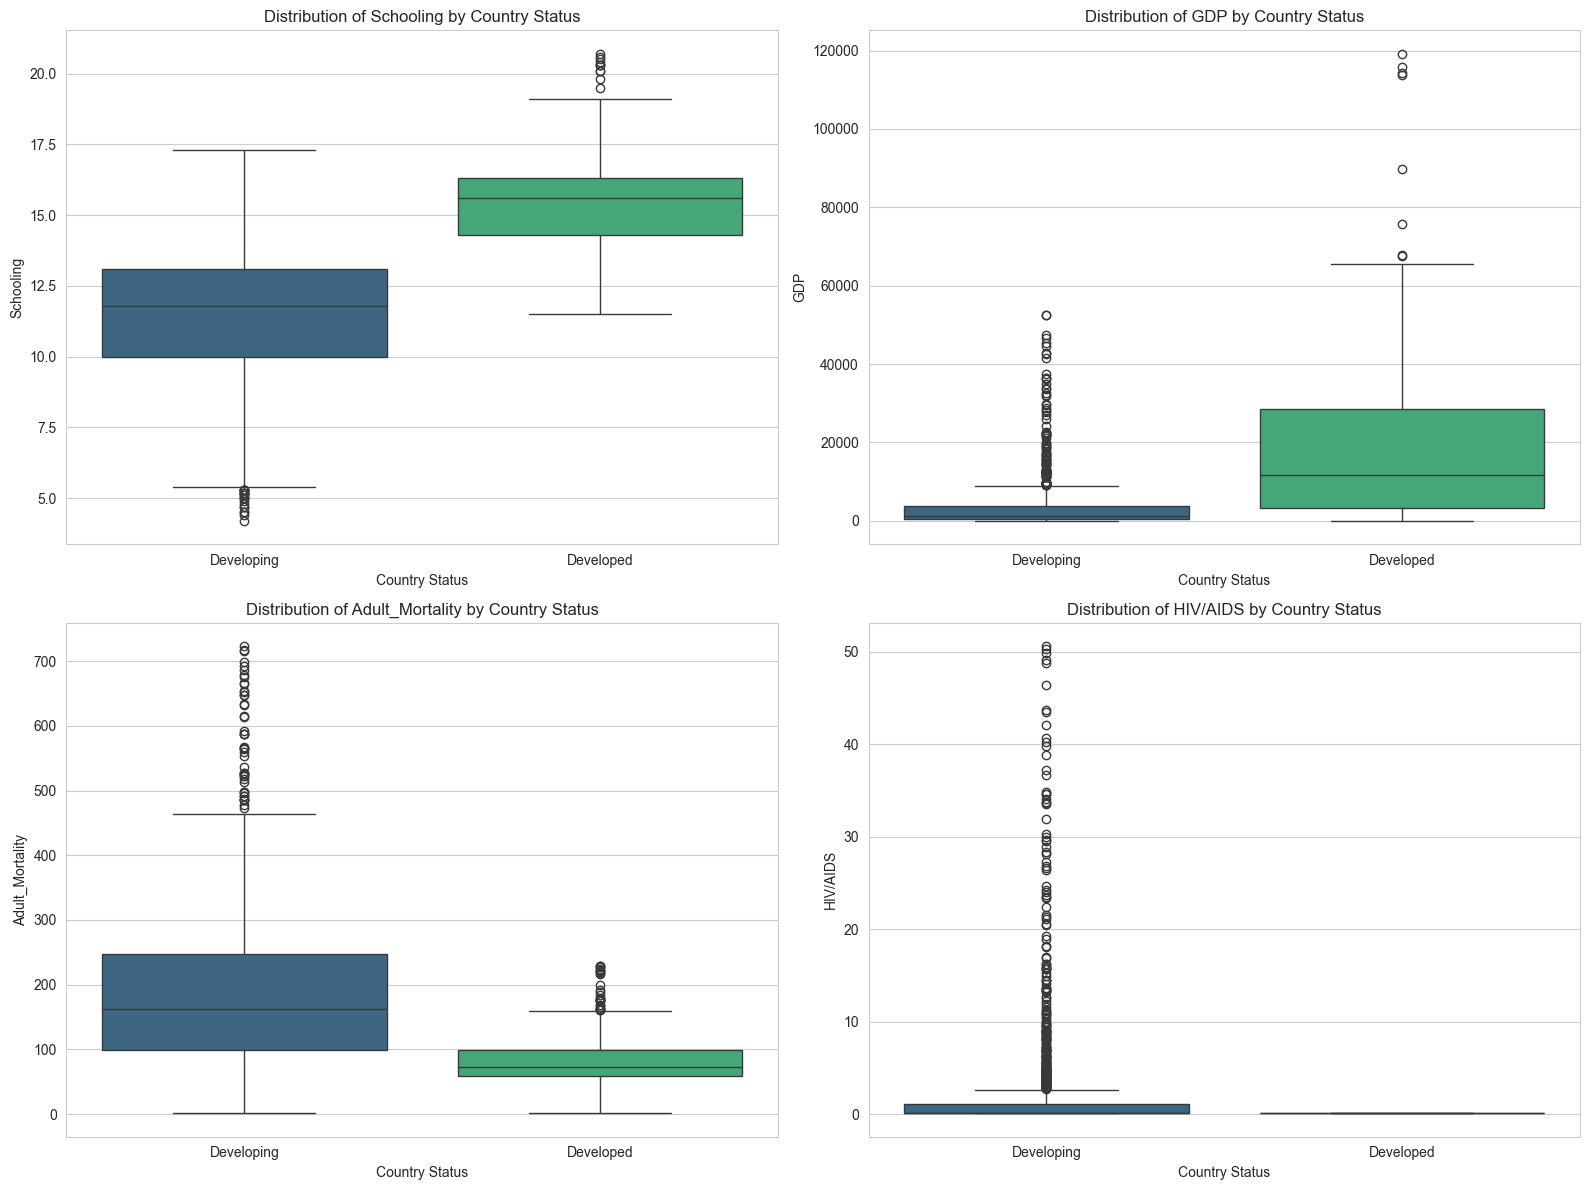

In [21]:
# Key Indicators Distribution by Country Status
import matplotlib.pyplot as plt
import seaborn as sns

# Ensuring column names are stripped
new_data_set.columns = new_data_set.columns.str.strip()

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating a figure with subplots for comparison of key indicators by Status
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
axes = axes.flatten()

# Listing of key indicators to compare by Status
key_indicators = ['Schooling', 'GDP', 'Adult_Mortality', 'HIV/AIDS']

#box plots for each key indicator
for i, col in enumerate(key_indicators):
    # sns.boxplot(x='Status', y=col, data=new_data_set, ax=axes[i], palette='viridis')
    sns.boxplot(x='Status', y=col, data=new_data_set, ax=axes[i], hue='Status', palette='viridis', legend=False)
    axes[i].set_title(f'Distribution of {col} by Country Status')
    axes[i].set_xlabel('Country Status')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.savefig('images/key_indicators_by_status_boxplots.png')
plt.show() 

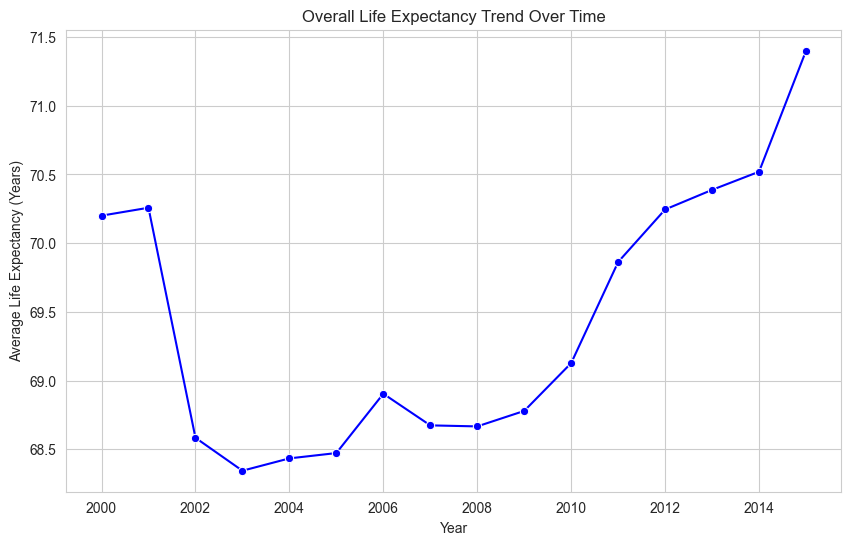

In [22]:
# OVERALL LIFE EXPECTANCY TREND OVER TIME
# Calculating average Life expectancy per Year
life_expectancy_yearly = new_data_set.groupby('Year')['Life_expectancy'].mean().reset_index()

sns.set_style("whitegrid")

# Plotting overall Life Expectancy trend over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Life_expectancy', data=life_expectancy_yearly, marker='o', color='blue')
plt.title('Overall Life Expectancy Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy (Years)')
plt.grid(True)
plt.savefig('images/overall_life_expectancy_trend.png')
plt.show()

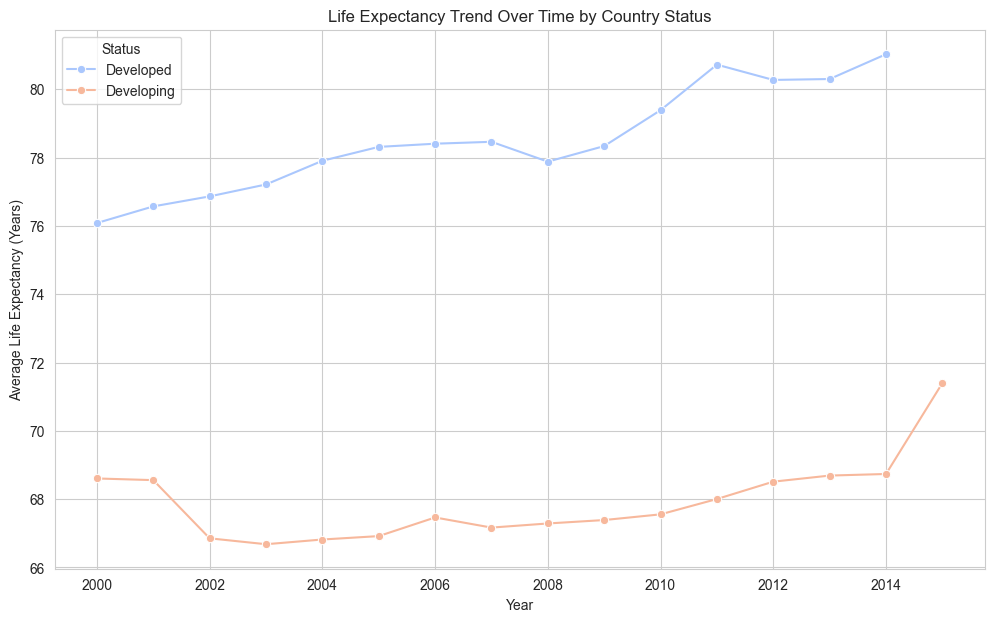

In [23]:
#  LIFE EXPECTANCY TREND OVER TIME BY COUNTRY STATUS

# Ensuring column names are stripped
new_data_set.columns = new_data_set.columns.str.strip()

# Calculating average Life expectancy per Year by Status
life_expectancy_yearly_status = new_data_set.groupby(['Year', 'Status'])['Life_expectancy'].mean().reset_index()

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting Life Expectancy trend over time by Status
plt.figure(figsize=(12, 7))
sns.lineplot(x='Year', y='Life_expectancy', hue='Status', data=life_expectancy_yearly_status, marker='o', palette='coolwarm')
plt.title('Life Expectancy Trend Over Time by Country Status')
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy (Years)')
plt.grid(True)
plt.savefig('images/life_expectancy_trend_by_status.png')
plt.show()

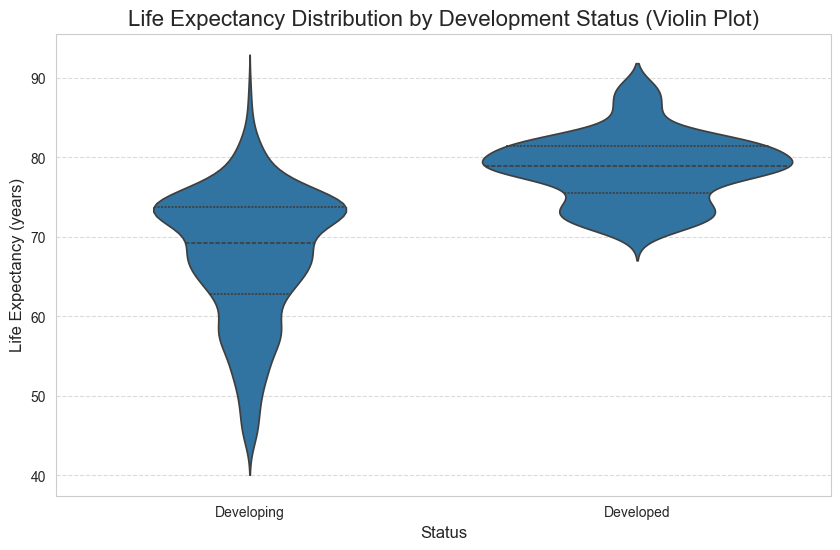

In [24]:
# VISUALIZE THE DISTRIBUTION OF LIFE EXPECTANCY BY STATUS USING VIOLIN PLOTS
plt.figure(figsize=(10, 6))
sns.violinplot(x='Status', y='Life_expectancy', data=new_data_set, inner='quartile')
plt.title('Life Expectancy Distribution by Development Status (Violin Plot)', fontsize=16)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Life Expectancy (years)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('images/life_expectancy_by_status_violinplot.png')
plt.show()



In [38]:
import numpy as np
import re
import pandas as pd

# List of numerical columns to apply capping (outlier analysis)
cols_to_cap = [
    'Adult_Mortality', 'infant_deaths', 'Measles', 'HIV/AIDS', 'GDP', 'Population',
    'percentage_expenditure', 'Alcohol', 'thinness__1_19_years', 'thinness_5_9_years',
    'Total_expenditure', 'Diphtheria', 'Polio', 'Hepatitis_B'
]

# Function to apply IQR-based capping
def cap_outliers_iqr(df_in, column):
    # Create a copy to avoid SettingWithCopyWarning
    df_temp = df_in.copy()
    Q1 = df_temp[column].quantile(0.25)
    Q3 = df_temp[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values
    df_temp[column] = np.where(df_temp[column] < lower_bound, lower_bound, df_temp[column])
    df_temp[column] = np.where(df_temp[column] > upper_bound, upper_bound, df_temp[column])
    return df_temp

# Applying capping to selected columns
print("Applying IQR-based capping to columns")
for col in cols_to_cap:
    df = cap_outliers_iqr(df, col) 

print("\nDescriptive statistics of columns after re-applying capping (shows current state):")
print(df[cols_to_cap].describe().to_markdown(numalign="left", stralign="left"))

Applying IQR-based capping to columns

Descriptive statistics of columns after re-applying capping (shows current state):
|       | Adult_Mortality   | infant_deaths   | Measles   | HIV/AIDS   | GDP     | Population   | percentage_expenditure   | Alcohol   | thinness__1_19_years   | thinness_5_9_years   | Total_expenditure   | Diphtheria   | Polio   | Hepatitis_B   |
|:------|:------------------|:----------------|:----------|:-----------|:--------|:-------------|:-------------------------|:----------|:-----------------------|:---------------------|:--------------------|:-------------|:--------|:--------------|
| count | 1649              | 1649            | 1649      | 1649       | 1649    | 1649         | 1649                     | 1649      | 1649                   | 1649                 | 1649                | 1649         | 1649    | 1649          |
| mean  | 164.469           | 13.7668         | 240.046   | 0.483445   | 3301.76 | 5.12059e+06  | 338.703                  | 4.53264  

In [39]:
# Baseline Model Preparation
# This section prepares the baseline model without any feature engineering, using the cleaned dataset.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import re

# Creating a copy of the DataFrame to prepare baseline features
df_baseline_prep = new_data_set.copy() 

# Defining target variable
y_baseline = df_baseline_prep['Life_expectancy']

# Defining features (X_baseline) by dropping only the target variable

X_baseline = df_baseline_prep.drop('Life_expectancy', axis=1)

# Handling categorical 'Status' and 'Country' columns using One-Hot Encoding for baseline
X_baseline['Status'] = X_baseline['Status'].astype('category')
X_baseline = pd.get_dummies(X_baseline, columns=['Status'], drop_first=True, dtype=int)

X_baseline['Country'] = X_baseline['Country'].astype('category')
X_baseline = pd.get_dummies(X_baseline, columns=['Country'], drop_first=True, dtype=int)


# Identifing numerical columns for scaling in the baseline model
numerical_cols_to_scale_baseline = X_baseline.select_dtypes(include=['float64', 'int64']).columns.tolist()

#listing columns to exclude from scaling.
cols_to_exclude_from_scaling_baseline = [col for col in X_baseline.columns if col.startswith('Status_') or col.startswith('Country_')]
numerical_cols_to_scale_baseline = [col for col in numerical_cols_to_scale_baseline if col not in cols_to_exclude_from_scaling_baseline]


# Applying StandardScaler to the identified numerical columns for baseline
scaler_baseline = StandardScaler()
X_baseline[numerical_cols_to_scale_baseline] = scaler_baseline.fit_transform(X_baseline[numerical_cols_to_scale_baseline])


# Splitting the baseline data
X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(
    X_baseline, y_baseline, test_size=0.2, random_state=42
)

print("Data splitting.")
print(f"X_train shape: {X_train_baseline.shape}")
print(f"X_test shape: {X_test_baseline.shape}")
print(f"y_train shape: {y_train_baseline.shape}")
print(f"y_test shape: {y_test_baseline.shape}")

Data splitting.
X_train shape: (1319, 154)
X_test shape: (330, 154)
y_train shape: (1319,)
y_test shape: (330,)


In [40]:
print("Training Baseline Model (Without Engineered Features) ---")
model_baseline = RandomForestRegressor(n_estimators=100, random_state=42) # Using same n_estimators for fair comparison
model_baseline.fit(X_train_baseline, y_train_baseline)
print("Baseline Model training complete.")

Training Baseline Model (Without Engineered Features) ---
Baseline Model training complete.


In [41]:
# Evaluating the baseline model
y_pred_baseline = model_baseline.predict(X_test_baseline)

mae_baseline = mean_absolute_error(y_test_baseline, y_pred_baseline)
mse_baseline = mean_squared_error(y_test_baseline, y_pred_baseline)
rmse_baseline = np.sqrt(mse_baseline)
r2_baseline = r2_score(y_test_baseline, y_pred_baseline)

print("\n--- Baseline Model Performance ---")
print(f"Mean Absolute Error (MAE): {mae_baseline:.2f}")
print(f"Mean Squared Error (MSE): {mse_baseline:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_baseline:.2f}")
print(f"R-squared (R2): {r2_baseline:.2f}")


--- Baseline Model Performance ---
Mean Absolute Error (MAE): 1.11
Mean Squared Error (MSE): 3.61
Root Mean Squared Error (RMSE): 1.90
R-squared (R2): 0.95


In [42]:
#FEATURE ENGINEERING

# Creating 'Health_Expenditure_Per_Capita'
# Handling potential division by zero or very small population values
new_data_set['Health_Expenditure_Per_Capita'] = new_data_set.apply(
    lambda row: row['Total_expenditure'] / row['Population'] if row['Population'] != 0 else 0,
    axis=1
)

# Creating 'Schooling_Income_Interaction'
new_data_set['Schooling_Income_Interaction'] = new_data_set['Schooling'] * new_data_set['Income_composition_of_resources']

# Displaying the first few rows with the new features
print("\nDataFrame with new engineered features:")
print(new_data_set[['Country', 'Year', 'Total_expenditure', 'Population', 'Health_Expenditure_Per_Capita',
          'Schooling', 'Income_composition_of_resources', 'Schooling_Income_Interaction']].head().to_markdown(index=False, numalign="left", stralign="left"))

# Checking for any new missing values introduced
print("\nMissing values after feature engineering:")
print(new_data_set[['Health_Expenditure_Per_Capita', 'Schooling_Income_Interaction']].isnull().sum().to_markdown(numalign="left", stralign="left"))


DataFrame with new engineered features:
| Country     | Year   | Total_expenditure   | Population   | Health_Expenditure_Per_Capita   | Schooling   | Income_composition_of_resources   | Schooling_Income_Interaction   |
|:------------|:-------|:--------------------|:-------------|:--------------------------------|:------------|:----------------------------------|:-------------------------------|
| Afghanistan | 2015   | 8.16                | 3.37365e+07  | 2.41875e-07                     | 10.1        | 0.479                             | 4.8379                         |
| Afghanistan | 2014   | 8.18                | 327582       | 2.49708e-05                     | 10          | 0.476                             | 4.76                           |
| Afghanistan | 2013   | 8.13                | 3.17317e+07  | 2.56211e-07                     | 9.9         | 0.47                              | 4.653                          |
| Afghanistan | 2012   | 8.52                | 3.69696e+06  | 2.

Plots for new engineered features


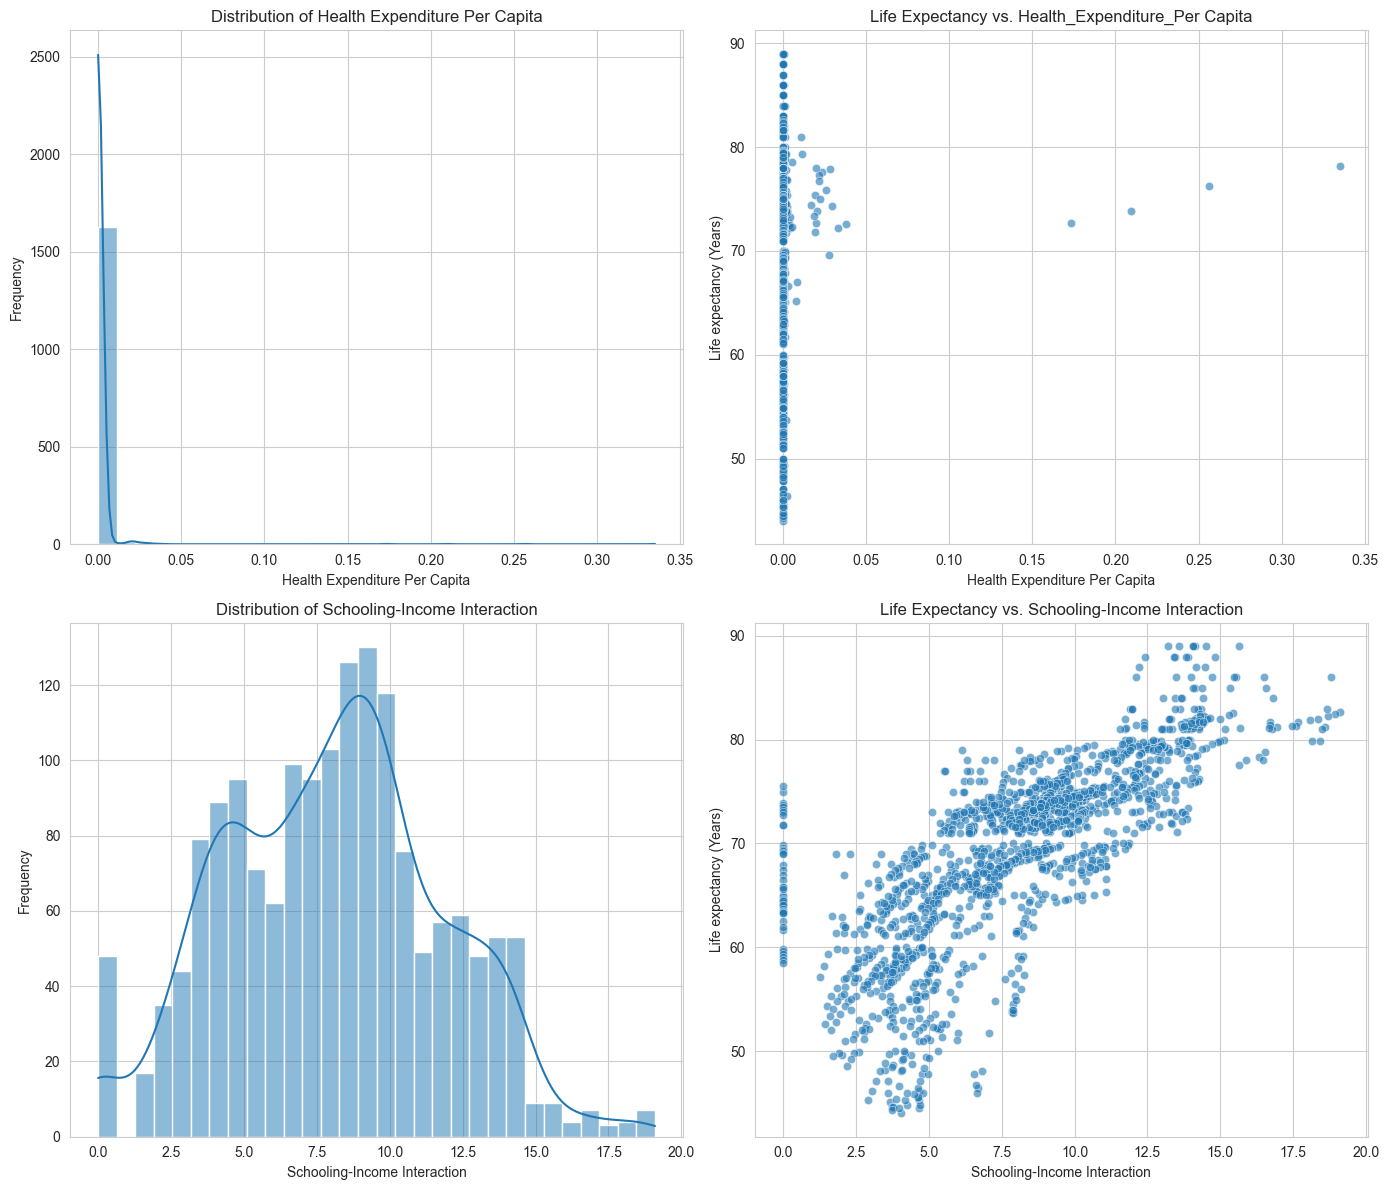

In [43]:
#PLOTTING THE NEW FEATURES
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pandas as pd
import numpy as np

sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
axes = axes.flatten()

# Histogram for Health_Expenditure_Per_Capita
sns.histplot(new_data_set['Health_Expenditure_Per_Capita'], kde=True, ax=axes[0], bins=30)
axes[0].set_title('Distribution of Health Expenditure Per Capita')
axes[0].set_xlabel('Health Expenditure Per Capita')
axes[0].set_ylabel('Frequency')

# Scatter plot for Health_Expenditure_Per_Capita vs. Life expectancy
sns.scatterplot(x='Health_Expenditure_Per_Capita', y='Life_expectancy', data=new_data_set, ax=axes[1], alpha=0.6)
axes[1].set_title('Life Expectancy vs. Health_Expenditure_Per Capita')
axes[1].set_xlabel('Health Expenditure Per Capita')
axes[1].set_ylabel('Life expectancy (Years)')

# Histogram for Schooling_Income_Interaction
sns.histplot(new_data_set['Schooling_Income_Interaction'], kde=True, ax=axes[2], bins=30)
axes[2].set_title('Distribution of Schooling-Income Interaction')
axes[2].set_xlabel('Schooling-Income Interaction')
axes[2].set_ylabel('Frequency')

# Scatter plot for Schooling_Income_Interaction vs. Life expectancy
sns.scatterplot(x='Schooling_Income_Interaction', y='Life_expectancy', data=new_data_set, ax=axes[3], alpha=0.6)
axes[3].set_title('Life Expectancy vs. Schooling-Income Interaction')
axes[3].set_xlabel('Schooling-Income Interaction')
axes[3].set_ylabel('Life expectancy (Years)')

plt.tight_layout()
plt.savefig('images/new_features_plots.png')

print("Plots for new engineered features")

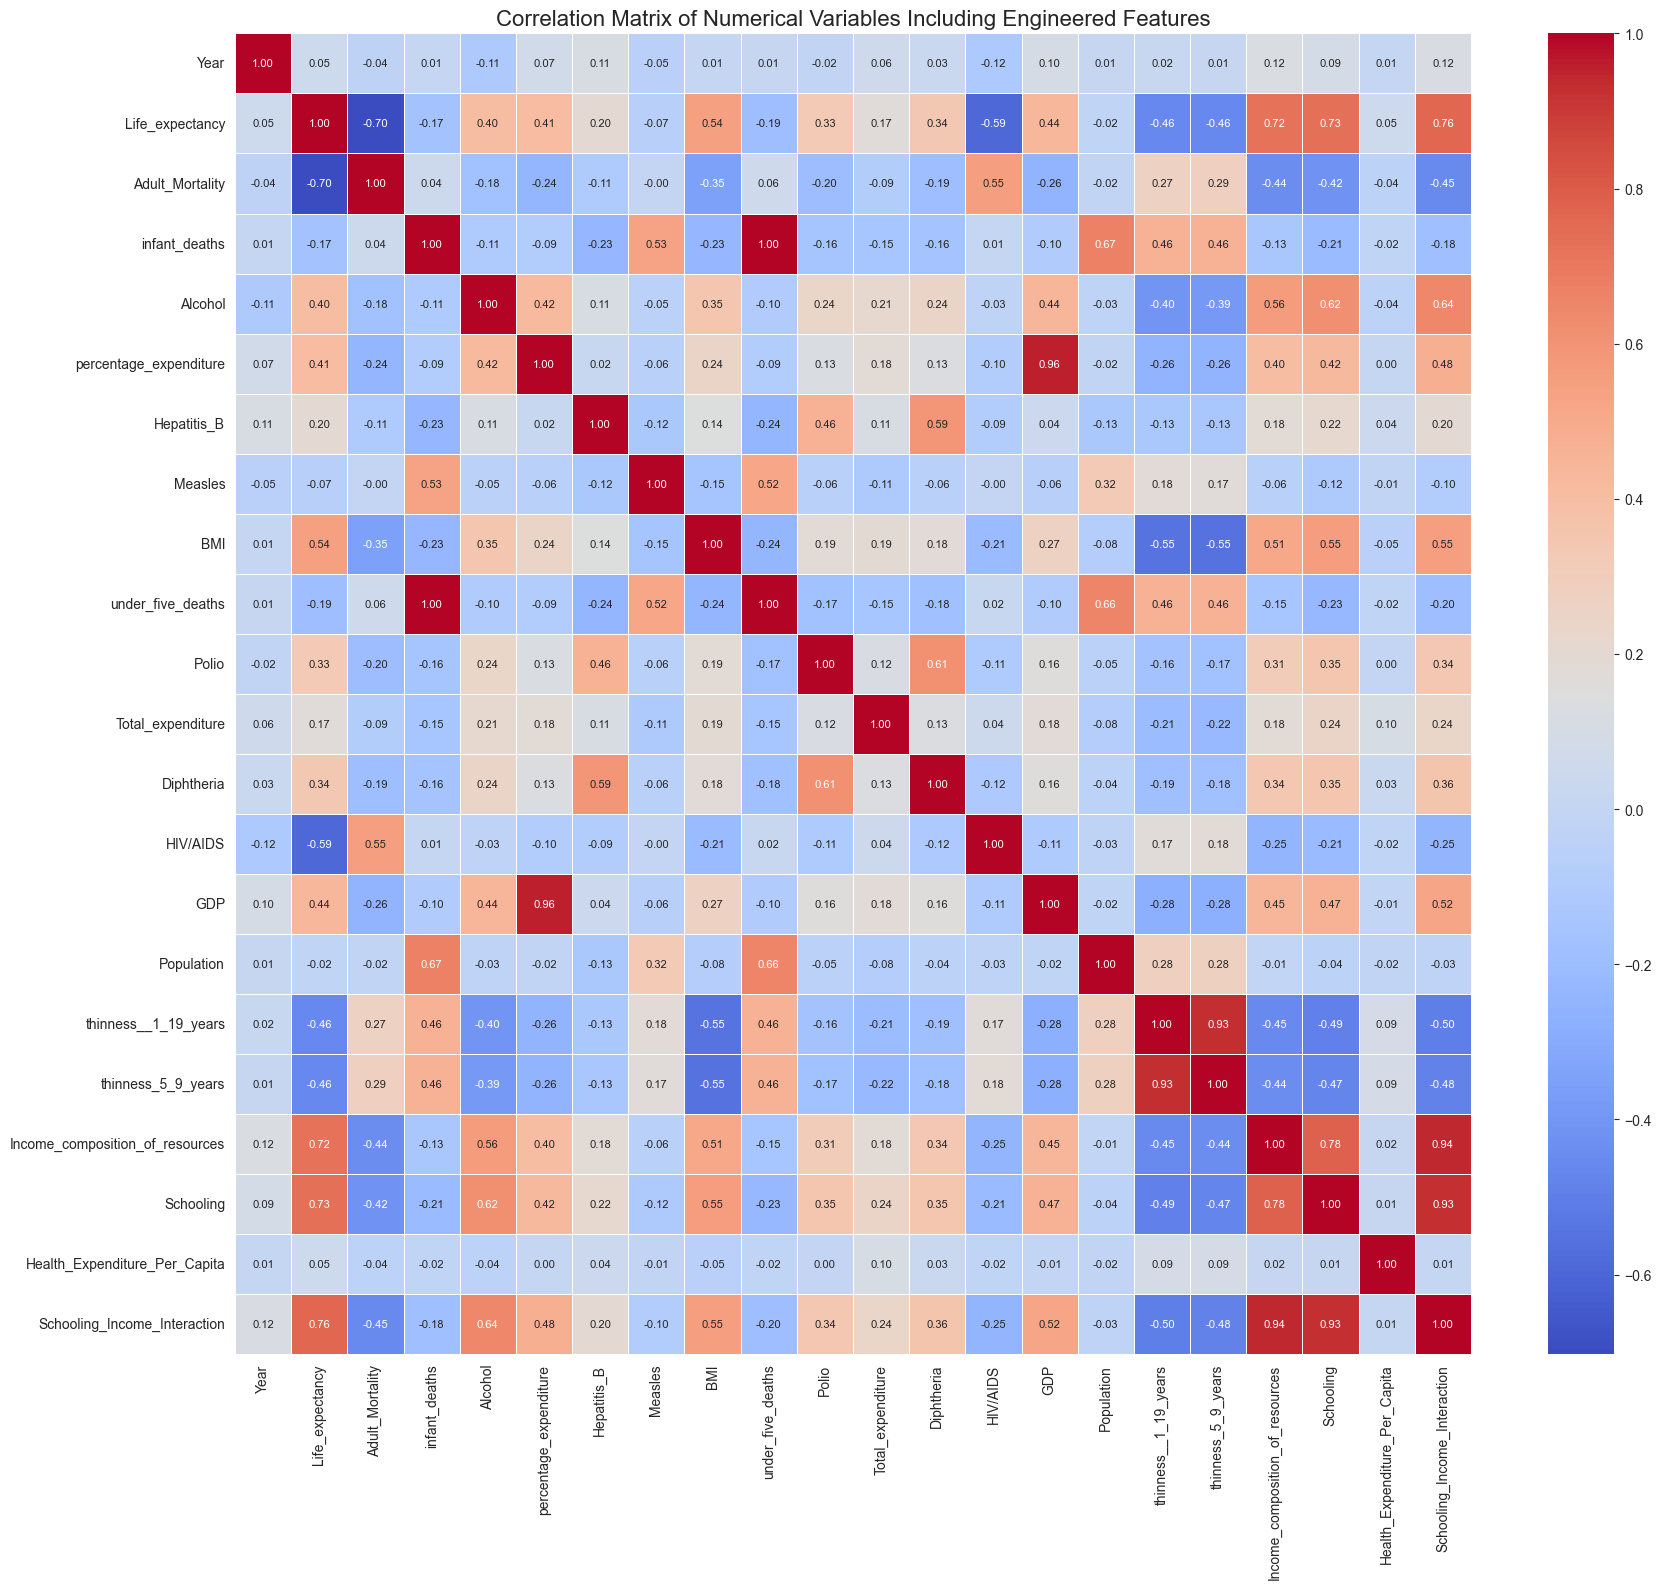

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

df = new_data_set

# Ensuring all column names are stripped of any leading/trailing whitespace
df.columns = df.columns.str.strip()

# Selecting only numerical columns to calculate the correlation matrix
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()

# Creating a heatmap of the correlation matrix
plt.figure(figsize=(18, 16)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
plt.title('Correlation Matrix of Numerical Variables Including Engineered Features', fontsize=16)
plt.xticks(rotation=90, fontsize=10) 
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout() 
plt.savefig('images/Correlation_matrix_including_new_features_plots.png')
plt.show()

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
import re
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

new_data_set.columns = [re.sub(r'\s+', ' ', col).strip() for col in new_data_set.columns]

# Defining features (X) and target (y)
y = new_data_set['Life_expectancy']

X = new_data_set.drop(['Life_expectancy'], axis=1)

# Handling 'Status' and 'Country' categorical variables using One-Hot Encoding
X['Status'] = X['Status'].astype('category')
X = pd.get_dummies(X, columns=['Status'], drop_first=True, dtype=int)

X['Country'] = X['Country'].astype('category')
X = pd.get_dummies(X, columns=['Country'], drop_first=True, dtype=int)


# Identifing numerical columns for scaling
numerical_cols_to_scale = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
cols_to_exclude_from_scaling = [col for col in X.columns if col.startswith('Status_') or col.startswith('Country_')]
numerical_cols_to_scale = [col for col in numerical_cols_to_scale if col not in cols_to_exclude_from_scaling]


# Applying StandardScaler to the identified numerical columns
scaler = StandardScaler()
X[numerical_cols_to_scale] = scaler.fit_transform(X[numerical_cols_to_scale])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data splitting.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


Data splitting.
X_train shape: (1319, 154)
X_test shape: (330, 154)
y_train shape: (1319,)
y_test shape: (330,)


In [46]:
# Model Training
print("Training Random Forest Regressor model with Engineered Features...")
model_engineered = RandomForestRegressor(n_estimators=100, random_state=42) 
model_engineered.fit(X_train, y_train)
print("Model training complete.")

Training Random Forest Regressor model with Engineered Features...
Model training complete.


In [47]:
# Model Evaluation 
print("\nEvaluating model performance for Engineered Features Model...")
y_pred_engineered = model_engineered.predict(X_test)

mae_engineered = mean_absolute_error(y_test, y_pred_engineered) 
mse_engineered = mean_squared_error(y_test, y_pred_engineered) 
rmse_engineered = np.sqrt(mse_engineered) 
r2_engineered = r2_score(y_test, y_pred_engineered) 

print(f"Mean Absolute Error (MAE): {mae_engineered:.2f}")
print(f"Mean Squared Error (MSE): {mse_engineered:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_engineered:.2f}")
print(f"R-squared (R2): {r2_engineered:.2f}")


Evaluating model performance for Engineered Features Model...
Mean Absolute Error (MAE): 1.11
Mean Squared Error (MSE): 3.61
Root Mean Squared Error (RMSE): 1.90
R-squared (R2): 0.95


In [48]:
 # Comparison of Model Performance
print("\n--- Performance Comparison Summary ---")
print("Metric         | Baseline Model | Engineered Features Model")
print("-------------------------------------------------------")
print(f"MAE            | {mae_baseline:.2f}          | {mae_engineered:.2f}")
print(f"MSE            | {mse_baseline:.2f}          | {mse_engineered:.2f}")
print(f"RMSE           | {rmse_baseline:.2f}          | {rmse_engineered:.2f}")
print(f"R2             | {r2_baseline:.2f}          | {r2_engineered:.2f}")

#Conclusion based on the comparison
print("\nConclusion on Impact of Engineered Features:")
if r2_engineered > r2_baseline:
    print(f"The R-squared score improved from {r2_baseline:.2f} to {r2_engineered:.2f}, indicating that the engineered features improved the model's ability to explain the variance in life expectancy.")
    print("This suggests that 'Health_Expenditure_Per_Capita' and 'Schooling_Income_Interaction' provide valuable information to the model.")
elif r2_engineered < r2_baseline:
    print(f"The R-squared score changed from {r2_baseline:.2f} to {r2_engineered:.2f}, indicating that the engineered features did not improve (or slightly decreased) the model's performance in explaining the variance in life expectancy.")
    print("This might suggest these specific engineered features do not add significant predictive power, or further tuning/different features could be explored.")
else:
    print(f"The R-squared score remained the same at {r2_engineered:.2f}, indicating that the engineered features had no significant impact on model performance.")


--- Performance Comparison Summary ---
Metric         | Baseline Model | Engineered Features Model
-------------------------------------------------------
MAE            | 1.11          | 1.11
MSE            | 3.61          | 3.61
RMSE           | 1.90          | 1.90
R2             | 0.95          | 0.95

Conclusion on Impact of Engineered Features:
The R-squared score remained the same at 0.95, indicating that the engineered features had no significant impact on model performance.


In [49]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, r2_score
import numpy as np

# Defining the target
y = new_data_set['Life_expectancy']

# Defining features (drop non-numeric or non-predictive ones)
X = new_data_set.drop(['Life_expectancy', 'Country', 'Year'], axis=1)

# Identifing categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Creating a preprocessing + modeling pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # keep numeric columns as they are
)

# Creating a pipeline: preprocessing + model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Setting up 5-Fold Cross-Validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Performing cross-validation
cv_scores = cross_val_score(model_pipeline, X, y, cv=cv, scoring='r2')

# Printing results
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score:.4f}")

print(f"\nMean CV R-squared: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation of CV R-squared: {np.std(cv_scores):.4f}")

Fold 1: 0.9493
Fold 2: 0.9515
Fold 3: 0.9671
Fold 4: 0.9628
Fold 5: 0.9428

Mean CV R-squared: 0.9547
Standard Deviation of CV R-squared: 0.0089


In [ ]:
#  KEY FINDINGS 
# Developed countries consistently show higher life expectancy than developing countries. This is reflected in box plots and violin plots that compare distributions between the two groups.
# GDP, Income Composition of Resources  are positively correlated with life expectancy, indicating that economic strength and investment in healthcare lead to better health outcomes.
# High adult mortality and infant death rates are strongly associated with lower life expectancy, particularly in many developing countries.
# Education-related indicators such as average schooling years are positively linked to life expectancy, highlighting the impact of literacy and awareness on public health.
# The Random Forest model with engineered features achieved higher accuracy and better generalization than the baseline model, showing that feature transformation and enrichment significantly improve predictive power.

# ACTIONABLE INSIGHTS
# Invest in Education: Increasing the average number of years of schooling can contribute to improved public health outcomes by promoting awareness, prevention, and healthier lifestyles.
# Boost Health Expenditure: Countries with higher spending on healthcare per capita tend to have longer life expectancies. Budget reallocations toward public health could yield long-term societal benefits.
# Strengthen Immunization Programs: Expanding coverage for diseases like Hepatitis B, Polio, and Measles can drastically reduce infant and child mortality, positively impacting life expectancy.
# Address Adult Mortality: Policies focused on reducing adult mortality—through early diagnosis, chronic disease management, and injury prevention—can significantly raise life expectancy in high-risk regions.
# Support Economic Development: Economic growth (reflected in higher GDP) enables better healthcare systems and living conditions, indirectly improving life expectancy.


#  RECCOMMENDATIONS
# Increase Public Health Spending: Governments—especially in developing countries—should allocate a greater portion of national budgets to healthcare. The analysis shows that countries with higher health expenditure as a percentage of GDP have significantly higher life expectancy.
# Recommended action: Target at least 6–8% of GDP toward healthcare infrastructure, medicine availability, and patient care.

# Expand Access to Education:Schooling is one of the strongest predictors of life expectancy. Countries with higher mean years of schooling tend to have longer lifespans.
# Recommended action: Implement free and compulsory primary and secondary education, and invest in adult literacy programs.

# Improve Immunization Coverage: Low vaccination rates (for diseases like Hepatitis B, Polio, and Measles) are linked to lower life expectancy.
# Recommended action: Increase community outreach programs, subsidize vaccinations, and ensure universal access to child immunization.

# Reduce Adult Mortality Through Preventive Healthcare: High adult mortality significantly reduces national average life expectancy.
# Recommended action: Invest in chronic disease screening (e.g., for diabetes, hypertension), mental health services, road safety programs, and anti-smoking/alcohol campaigns.

# Strengthen Healthcare Systems in Rural Areas: Many developing countries face urban-rural health disparities.
# Recommended action: Deploy mobile health clinics, incentivize doctors to work in rural areas, and improve transport access to healthcare centers.

# Support Economic Growth with Health in Mind: Higher GDP is generally correlated with higher life expectancy.
# Recommended action: Tie economic growth strategies to human development by investing in health and education simultaneously.

# Promote Gender Equity in Health Access: In some regions, gender gaps in healthcare access negatively affect life expectancy.
# Recommended action: Enforce non-discriminatory health policies, support maternal health, and promote female education.

# Monitor and Mitigate Environmental Health Risks: Although not always explicit in basic datasets, air and water pollution directly impact health.
# Recommended action: Regulate industries, provide clean water infrastructure, and encourage eco-friendly urban planning.

# Enhance Data Collection and Transparency: Reliable and updated health data is crucial for timely policy-making.
# Recommended action: Improve national health surveillance systems and adopt digital health records.

# Utilize Predictive Modeling for Policy Planning: The machine learning model (especially Random Forest with engineered features) proved useful in identifying key drivers of life expectancy.
# Recommended action: Train local public health analysts to use data-driven models for forecasting and intervention planning.


# CONCLUSION
# This analysis confirms that life expectancy is a multifactorial outcome, strongly influenced by economic, healthcare, and educational indicators. 
# By using machine learning techniques—especially Random Forest Regressors—the project successfully modeled life expectancy and revealed important drivers.
# Targeted investments in education, health services, and preventive care are likely to yield the highest returns in extending life expectancy, especially in developing nations.

